In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/dataset.csv')
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [ ]:
data.shape

(112634, 17)

In [ ]:
data.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
data['Legislative District'] = data['Legislative District'].fillna(data['Legislative District']).mean()
#data['Electric Utility'] = data['Electric Utility'].fillna(data['Electric Utility']).mode()

In [ ]:
data.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
data.dropna(subset=['Electric Utility','Model','Vehicle Location'],inplace=True)


In [ ]:
data.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
data.shape

(112152, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112152 entries, 2 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112152 non-null  object 
 1   County                                             112152 non-null  object 
 2   City                                               112152 non-null  object 
 3   State                                              112152 non-null  object 
 4   Postal Code                                        112152 non-null  int64  
 5   Model Year                                         112152 non-null  int64  
 6   Make                                               112152 non-null  object 
 7   Model                                              112152 non-null  object 
 8   Electric Vehicle Type                              112152 non-null  object 
 9 

## Univariate Analysis

<ipython-input-11-df78a0567878>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Make'],order = data['Make'].value_counts().index,palette= 'Purples_r')


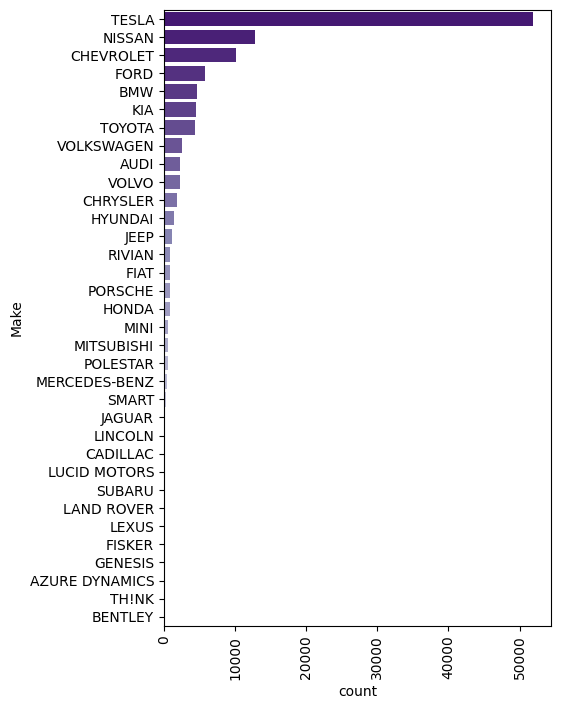

In [ ]:
plt.figure(figsize = (5,8))
sns.countplot(data['Make'],order = data['Make'].value_counts().index,palette= 'Purples_r')
plt.xticks(rotation = 90)
plt.show()


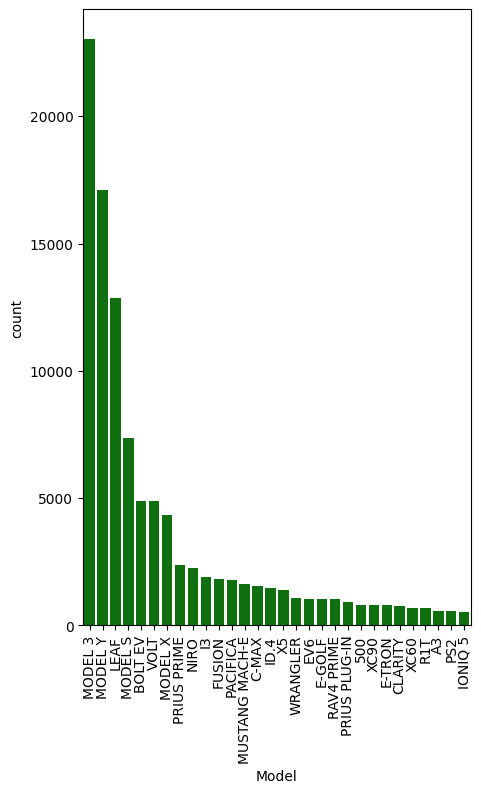

In [ ]:
plt.figure(figsize = (5,8))
top_30 = data['Model'].value_counts().nlargest(30).index
sns.countplot(x = data['Model'],order = top_30,width = 0.8, color = 'Green')
plt.xticks(rotation = 90)
plt.show()

<ipython-input-13-feac2d86b6d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Electric Range'],palette = 'Purples_r',


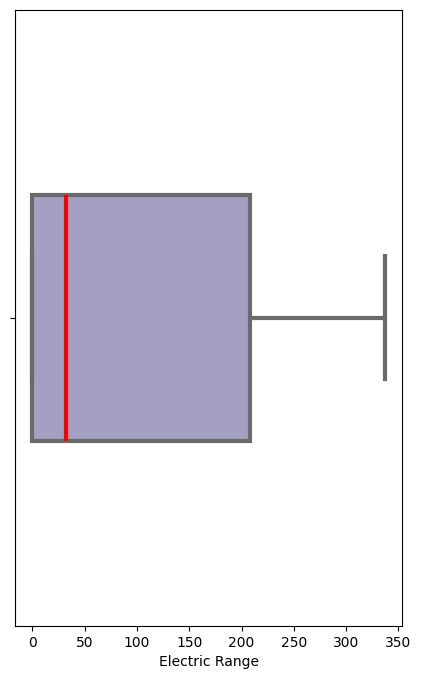

In [ ]:
plt.figure(figsize = (5,8))
sns.boxplot(x=data['Electric Range'],palette = 'Purples_r',
            width=0.4,
            color='lightblue',
            fliersize= 10,
            linewidth= 3,
            medianprops = {'color':'red','linewidth' :3})
plt.show()

##Bivariate Analysis

In [ ]:
# Filter the data for years between 2017 and 2020
filtered_data = data[(data['Model Year'] >= 2017) & (data['Model Year'] <= 2020)]


In [ ]:
# Count the number of vehicles launched by each company
company_launches = filtered_data['Make'].value_counts().reset_index()
company_launches.columns = ['Company Name', 'Vehicle Count']

# Sort by the highest number of vehicles launched
top_10_companies = company_launches.head(10)
# Display the top 10 companies
print(top_10_companies)


  Company Name  Vehicle Count
0        TESLA          21109
1    CHEVROLET           5829
2       NISSAN           4146
3       TOYOTA           2045
4          BMW           1815
5          KIA           1741
6     CHRYSLER           1043
7         FORD           1025
8         AUDI            969
9        HONDA            762


<ipython-input-17-36ce07d2be28>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_10_companies['Company Name'],y = top_10_companies['Vehicle Count'],palette = 'Purples_r')


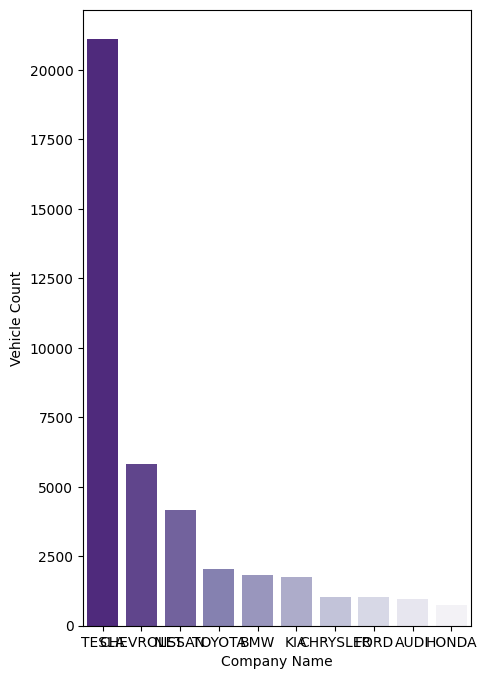

In [ ]:
plt.figure(figsize = (5,8))
sns.barplot(x = top_10_companies['Company Name'],y = top_10_companies['Vehicle Count'],palette = 'Purples_r')
plt.show()

In [ ]:
# Group by Year and Company Name to count the number of vehicles
yearly_company_vehicle_count = data.groupby(['Model Year', 'Make']).size().reset_index(name='Vehicle Count')

# Display the result
print(yearly_company_vehicle_count)


     Model Year        Make  Vehicle Count
0          1997   CHEVROLET              1
1          1998        FORD              1
2          1999        FORD              3
3          2000        FORD             10
4          2002      TOYOTA              2
..          ...         ...            ...
204        2023    POLESTAR             88
205        2023      SUBARU              1
206        2023       TESLA            890
207        2023  VOLKSWAGEN             69
208        2023       VOLVO              1

[209 rows x 3 columns]


In [ ]:
# Sort by Year and Vehicle Count in descending order
yearly_company_vehicle_count = yearly_company_vehicle_count.sort_values(by=['Model Year', 'Vehicle Count'], ascending=[True, False])

# Display the sorted result
print(yearly_company_vehicle_count)


     Model Year       Make  Vehicle Count
0          1997  CHEVROLET              1
1          1998       FORD              1
2          1999       FORD              3
3          2000       FORD             10
4          2002     TOYOTA              2
..          ...        ...            ...
193        2023       AUDI             11
196        2023       FORD              4
200        2023    LINCOLN              4
205        2023     SUBARU              1
208        2023      VOLVO              1

[209 rows x 3 columns]


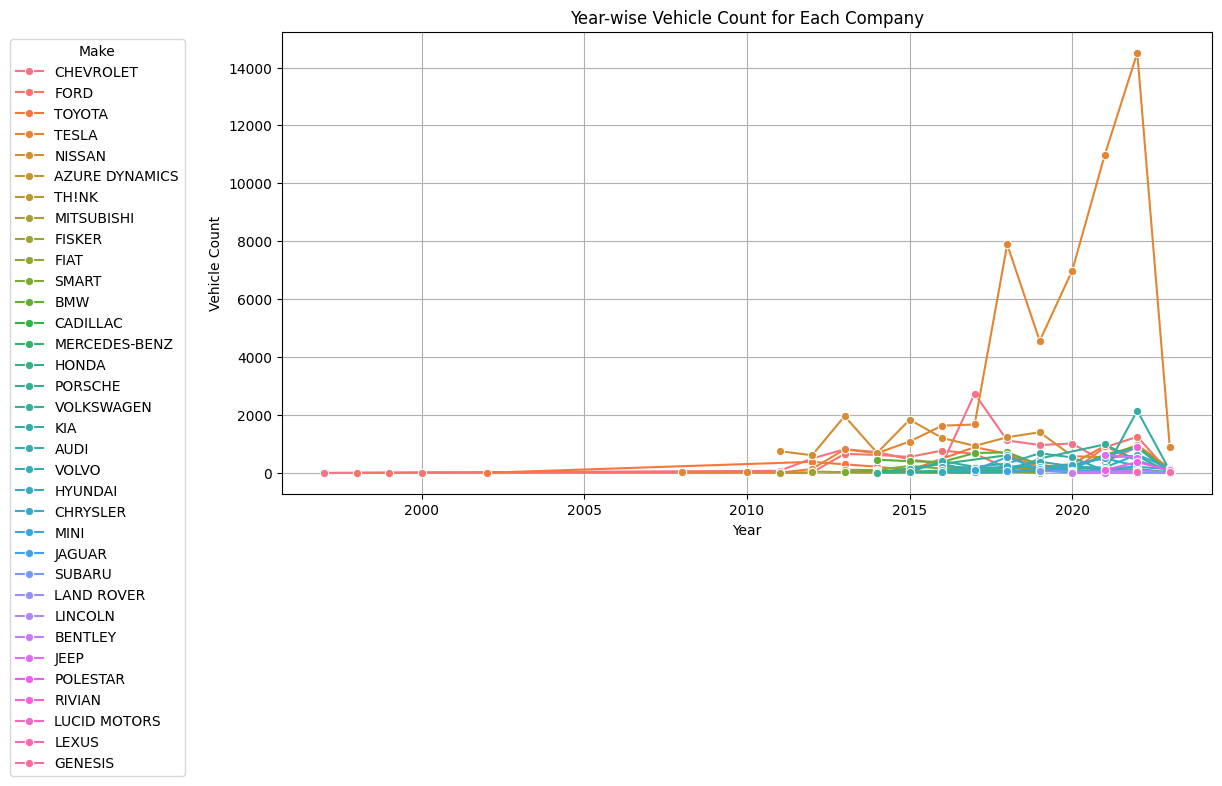

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the line plot with the legend positioned on the left side
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_company_vehicle_count, x='Model Year', y='Vehicle Count', hue='Make', marker='o')

# Move the legend to the left
plt.legend(bbox_to_anchor=(-0.3, 1), loc='upper left', title='Make')  # Adjust bbox_to_anchor as per your layout

# Title and labels
plt.title('Year-wise Vehicle Count for Each Company')
plt.xlabel('Year')
plt.ylabel('Vehicle Count')

# Display plot
plt.grid(True)
plt.show()


In [ ]:
!pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.0 MB/s eta 0:00:00


In [ ]:
import bar_chart_race as bce


In [ ]:
# Group by Make and Model Year, then count the occurrences (vehicles) for each company in each year
df_grouped = data.groupby(['Make', 'Model Year']).size().reset_index(name='Vehicle Count')

# Pivot the grouped data to get year-wise counts
pivot_df = df_grouped.pivot(index='Make', columns='Model Year', values='Vehicle Count').fillna(0)

# Make sure the columns are sorted by year
pivot_df = pivot_df.sort_index(axis=1)

# Display the pivot table
print(pivot_df)


Model Year      1997  1998  1999  2000  2002  2008  2010   2011   2012  \
Make                                                                     
AUDI             0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
AZURE DYNAMICS   0.0   0.0   0.0   0.0   0.0   0.0   0.0    4.0    3.0   
BENTLEY          0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
BMW              0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
CADILLAC         0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
CHEVROLET        1.0   0.0   0.0   0.0   0.0   0.0   0.0   71.0  496.0   
CHRYSLER         0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
FIAT             0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
FISKER           0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   20.0   
FORD             0.0   1.0   3.0  10.0   0.0   0.0   0.0    0.0   15.0   
GENESIS          0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
HONDA            0.0   0.0   0.0   0.0

In [ ]:
import bar_chart_race as bcr

# Create the racing bar chart animation
bcr.bar_chart_race(
    df=pivot_df,
    filename='EV_Make_Racing_Bar.mp4',  # Save as a video file
    orientation='h',  # Horizontal bar plot
    sort='desc',  # Sort by descending count
    n_bars=10,  # Top 10 EV companies
    steps_per_period=20,  # Smooth animation
    period_length=500,  # Duration for each year
    title='EV Makes Over the Years',  # Chart title
    dpi=144,  # Resolution
    cmap='dark24'  # Color palette
)


/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In [10]:
from IPython.display import Video

# Embed the MP4 file inline
Video("EV_Make_Racing_Bar.mp4", embed=True)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install plotly

In [12]:
df = pd.read_csv('/content/dataset.csv')


In [13]:
import plotly.express as px

In [ ]:
px.box(df,x = df['Electric Range'],y = df['Make'])

In [ ]:
px.pie(df,names = df['Make'],values = df['Electric Range'])

In [16]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.9 MB/s eta 0:00:00


In [17]:
import pycountry

# Function to convert common names to ISO country names
def convert_country_name(name):
    try:
        return pycountry.countries.lookup(name).name
    except LookupError:
        return name  # Return the name unchanged if no match found

# Apply the conversion to the 'County' column
df['County'] = df['County'].apply(convert_country_name)


In [18]:
# Example using Plotly's built-in dataset
sample_df = px.data.gapminder()
fig = px.choropleth(sample_df,
                    locations="country",
                    locationmode="country names",
                    color="gdpPercap",
                    hover_name="country",
                    animation_frame="year")
fig.show()
